In [9]:
pip install pandas matplotlib sqlalchemy pyodbc

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

query = """
SELECT TOP 10 *
FROM Person.Person
"""
data = pd.read_sql_query(query, engine)
print(data)


   BusinessEntityID PersonType  NameStyle Title FirstName MiddleName  \
0                 1         EM      False  None       Ken          J   
1                 2         EM      False  None     Terri        Lee   
2                 3         EM      False  None   Roberto       None   
3                 4         EM      False  None       Rob       None   
4                 5         EM      False   Ms.      Gail          A   
5                 6         EM      False   Mr.    Jossef          H   
6                 7         EM      False  None     Dylan          A   
7                 8         EM      False  None     Diane          L   
8                 9         EM      False  None      Gigi          N   
9                10         EM      False  None   Michael       None   

     LastName Suffix  EmailPromotion AdditionalContactInfo  \
0     Sánchez   None               0                  None   
1       Duffy   None               1                  None   
2  Tamburello   None 

In [11]:
from sqlalchemy import create_engine
import pandas as pd

#  Anslut till SQL Server
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# Fråga för att hämta alla tabeller från alla scheman
tables_query = """
SELECT 
    s.name AS SchemaName,
    t.name AS TableName
FROM 
    sys.tables t
JOIN 
    sys.schemas s ON t.schema_id = s.schema_id
ORDER BY 
    s.name, t.name;
"""

# Kör och ladda frågan i Pandas DataFrame
tables = pd.read_sql_query(tables_query, engine)

# Visa resultat
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Visa tabeller
print(tables)

# Spara resultat i csv fil
tables.to_csv("all_database_tables.csv", index=False)


        SchemaName                              TableName
0              dbo                         AWBuildVersion
1              dbo                            DatabaseLog
2              dbo                               ErrorLog
3   HumanResources                             Department
4   HumanResources                               Employee
5   HumanResources              EmployeeDepartmentHistory
6   HumanResources                     EmployeePayHistory
7   HumanResources                           JobCandidate
8   HumanResources                                  Shift
9           Person                                Address
10          Person                            AddressType
11          Person                         BusinessEntity
12          Person                  BusinessEntityAddress
13          Person                  BusinessEntityContact
14          Person                            ContactType
15          Person                          CountryRegion
16          Pe

In [12]:
# Hämta anställda per avdelning
query = """
SELECT 
    COALESCE(d.Name, 'Unassigned') AS Department, 
    COUNT(DISTINCT e.BusinessEntityID) AS Headcount
FROM 
    HumanResources.Employee e
LEFT JOIN 
    HumanResources.EmployeeDepartmentHistory edh ON e.BusinessEntityID = edh.BusinessEntityID
LEFT JOIN 
    HumanResources.Department d ON edh.DepartmentID = d.DepartmentID
GROUP BY 
    d.Name
ORDER BY 
    Headcount DESC;
"""

# Kör frågan och visa resultat
department_data = pd.read_sql_query(query, engine)

# Skriv ut result
print(department_data)


                    Department  Headcount
0                   Production        180
1                        Sales         18
2                   Purchasing         13
3                      Finance         11
4         Information Services         10
5                    Marketing         10
6                  Engineering          7
7   Facilities and Maintenance          7
8            Quality Assurance          7
9           Production Control          6
10      Shipping and Receiving          6
11             Human Resources          6
12            Document Control          5
13                 Tool Design          4
14    Research and Development          4
15                   Executive          2


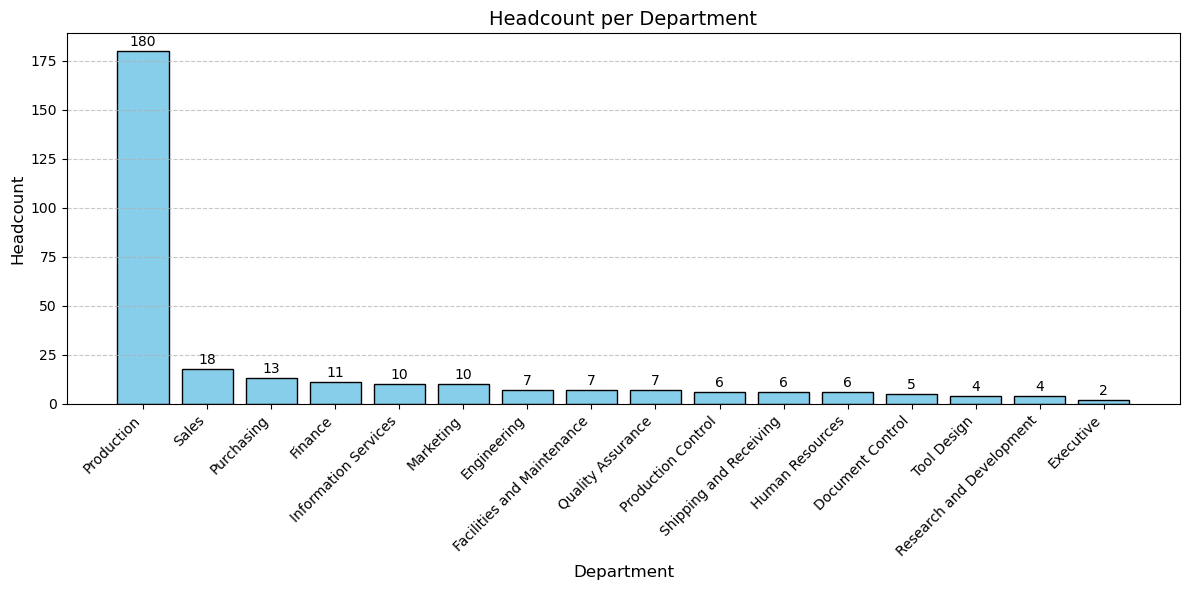

In [13]:
import matplotlib.pyplot as plt

# Data för diagramm för Anställda per avdelning
departments = department_data['Department']
headcounts = department_data['Headcount']

# Skapa stabeldiagram
plt.figure(figsize=(12, 6))
bars = plt.bar(departments, headcounts, color='skyblue', edgecolor='black')

# Lägg till labels and title
plt.xlabel('Department', fontsize=12)
plt.ylabel('Headcount', fontsize=12)
plt.title('Headcount per Department', fontsize=14)

# Lägg till nummer över varje stapel
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height + 1,  # Y-coordinate
        f'{int(height)}',  # Text to display
        ha='center', va='bottom', fontsize=10  # Center-align text
    )

# Rotera x-axel labels för bättre läsbarhet
plt.xticks(rotation=45, ha='right', fontsize=10)

# Lägg till gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visa diagrammet
plt.tight_layout()
plt.show()


In [14]:
# Hämta könsfördelning
query = """
SELECT Gender, COUNT(BusinessEntityID) AS Count
FROM HumanResources.Employee
GROUP BY Gender
"""
gender_data = pd.read_sql_query(query, engine)
print(gender_data)



  Gender  Count
0      F     84
1      M    206


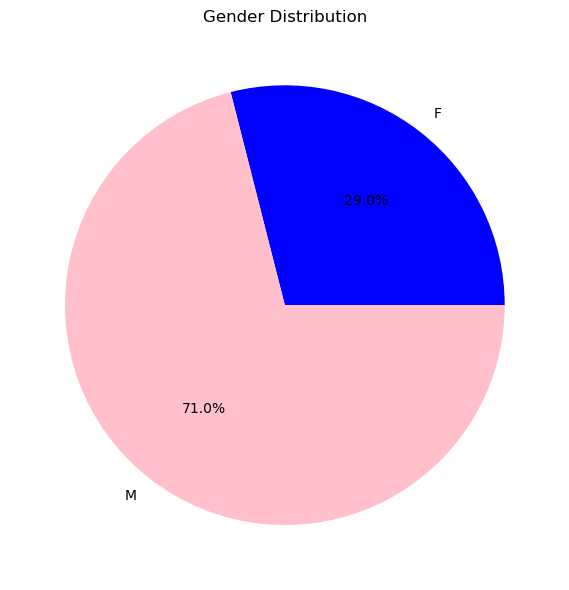

In [15]:
plt.figure(figsize=(8, 6))
plt.pie(gender_data['Count'], labels=gender_data['Gender'], autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()


In [16]:
# Hämta anställda per avdelning
query = """
SELECT d.Name AS Department, COUNT(e.BusinessEntityID) AS Headcount
FROM HumanResources.Department d
JOIN HumanResources.EmployeeDepartmentHistory edh
    ON d.DepartmentID = edh.DepartmentID
JOIN HumanResources.Employee e
    ON e.BusinessEntityID = edh.BusinessEntityID
GROUP BY d.Name
ORDER BY Headcount DESC
"""
department_data = pd.read_sql_query(query, engine)
print(department_data.head())

             Department  Headcount
0            Production        180
1                 Sales         18
2            Purchasing         13
3               Finance         11
4  Information Services         10


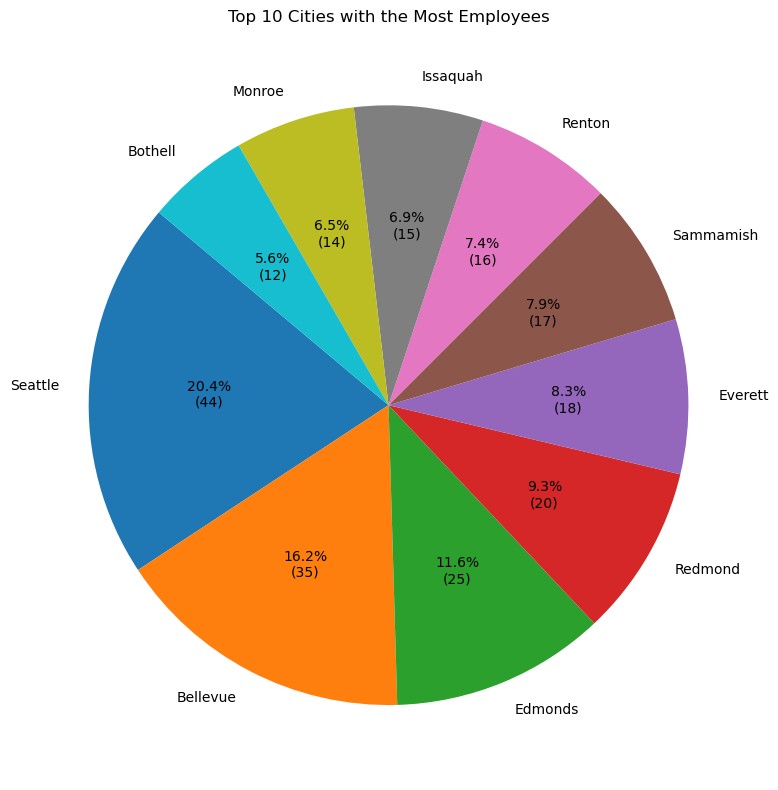

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Hämta anställda per stad
query = """
SELECT 
    a.City,
    COUNT(p.BusinessEntityID) AS EmployeeCount
FROM 
    Person.Person p
LEFT JOIN 
    Person.BusinessEntityAddress ba ON p.BusinessEntityID = ba.BusinessEntityID
LEFT JOIN 
    Person.Address a ON ba.AddressID = a.AddressID
WHERE 
    p.PersonType = 'EM'
GROUP BY 
    a.City
ORDER BY 
    EmployeeCount DESC;
"""

# Kör frågan
city_data = pd.read_sql_query(query, engine)

# Filtrera städer med anställda för bättre läsbarhet
city_data = city_data[city_data['EmployeeCount'] > 0]

# Limitera till top 10 städer med flest anställda
top_10_cities = city_data.nlargest(10, 'EmployeeCount')

# Visa antal och procent
def autopct_with_counts(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Skapa paj diagram för top 10 städer
plt.figure(figsize=(10, 8))
plt.pie(
    top_10_cities['EmployeeCount'], 
    labels=top_10_cities['City'], 
    autopct=lambda pct: autopct_with_counts(pct, top_10_cities['EmployeeCount']), 
    startangle=140
)
plt.title('Top 10 Cities with the Most Employees')
plt.tight_layout()
plt.show()




In [18]:
from sqlalchemy import create_engine
import pandas as pd

# Anslut till SQL Server
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# Hämta produktkategorier
categories_query = """
SELECT 
    ProductCategoryID,
    Name AS CategoryName
FROM 
    Production.ProductCategory;
"""

# Visa resultat
categories = pd.read_sql_query(categories_query, engine)

# Visa alla rader
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(categories)




   ProductCategoryID CategoryName
0                  4  Accessories
1                  1        Bikes
2                  3     Clothing
3                  2   Components


                          VendorName  PurchaseCount   TotalSpent
0                  Superior Bicycles            100  4555897.500
1  Professional Athletic Consultants            142  3058774.950
2               Chicago City Saddles            179  3029108.775
3                  Jackson Authority            120  2553243.000
4                Vision Cycles, Inc.            120  2513742.000
5                      Sport Fan Co.            117  2421619.200
6                    Proseware, Inc.            120  2347422.000
7         Greenwood Athletic Company            102  2237800.950
8                      Crowley Sport            102  2237800.950
9                    Mitchell Sports            100  2193922.500


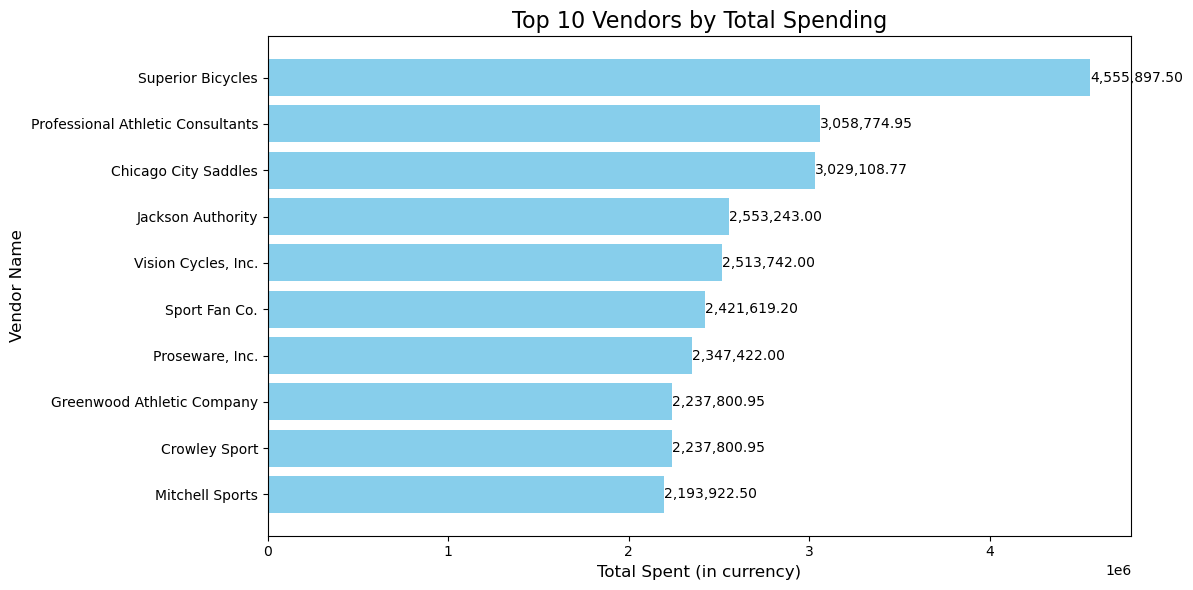

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# SQL-fråga
query = """
SELECT 
    TOP 10 -- Visa bara de 10 bästa leverantörerna för tydlighet
    v.Name AS VendorName,
    COUNT(po.PurchaseOrderID) AS PurchaseCount,
    SUM(pod.LineTotal) AS TotalSpent
FROM 
    Purchasing.Vendor v
LEFT JOIN 
    Purchasing.PurchaseOrderHeader po ON v.BusinessEntityID = po.VendorID
LEFT JOIN 
    Purchasing.PurchaseOrderDetail pod ON po.PurchaseOrderID = pod.PurchaseOrderID
GROUP BY 
    v.Name
ORDER BY 
    TotalSpent DESC;
"""

# Hämta data
purchasing_data = pd.read_sql_query(query, engine)

print(purchasing_data)

# Plot stapeldiagram
plt.figure(figsize=(12, 6))
bars = plt.barh(purchasing_data['VendorName'], purchasing_data['TotalSpent'], color='skyblue')

# Lägg till etiketter på staplarna
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.2f}', ha='left', va='center', fontsize=10)

# Diagraminställningar
plt.title('Top 10 Vendors by Total Spending', fontsize=16)
plt.xlabel('Total Spent (in currency)', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)
plt.gca().invert_yaxis()  # Vänd ordningen så att den största leverantören är överst
plt.tight_layout()

# Visa diagrammet
plt.show()

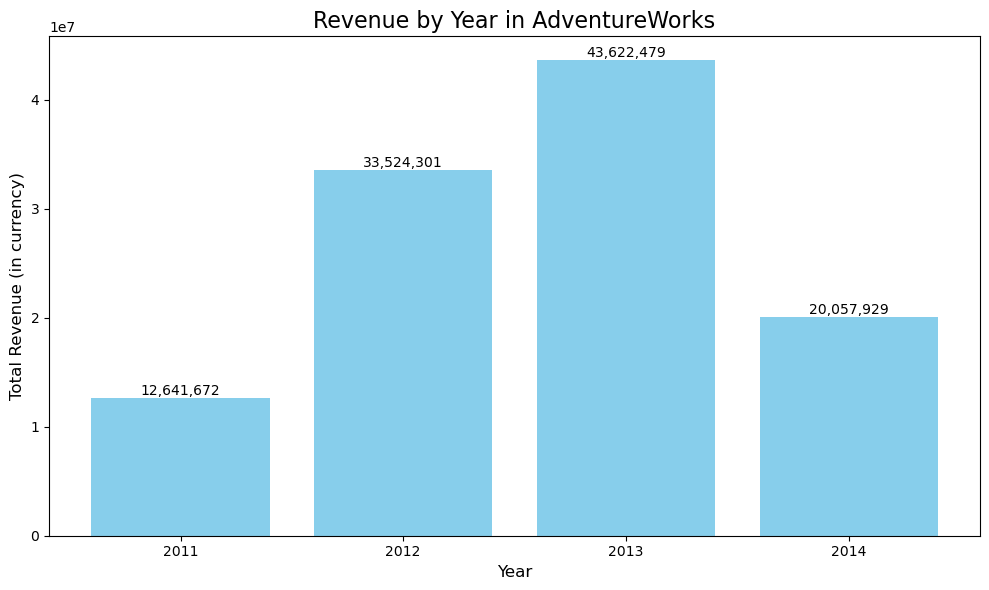

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# SQL-fråga
query = """
SELECT 
    YEAR(soh.OrderDate) AS SalesYear,
    SUM(sod.LineTotal) AS TotalRevenue
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
GROUP BY 
    YEAR(soh.OrderDate)
ORDER BY 
    SalesYear;
"""

# Hämta data
revenue_data = pd.read_sql_query(query, engine)

# Plot stapeldiagram
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_data['SalesYear'], revenue_data['TotalRevenue'], color='skyblue')

# Lägg till etiketter ovanför varje stapel
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

# Diagraminställningar
plt.title('Revenue by Year in AdventureWorks', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (in currency)', fontsize=12)
plt.xticks(revenue_data['SalesYear'])
plt.tight_layout()

# Visa diagrammet
plt.show()


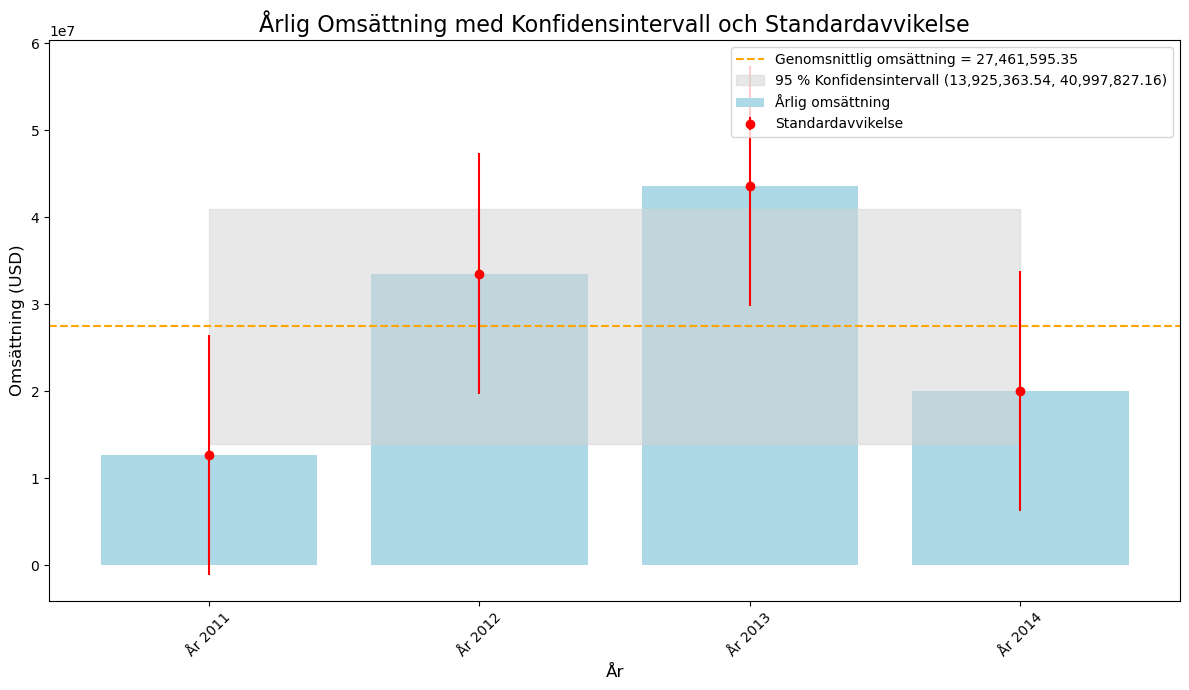

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# SQL-fråga för att hämta årlig omsättning
query = """
SELECT 
    YEAR(soh.OrderDate) AS SalesYear,
    SUM(sod.LineTotal) AS TotalRevenue
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
GROUP BY 
    YEAR(soh.OrderDate)
ORDER BY 
    SalesYear;
"""

# Hämta data
revenue_data = pd.read_sql_query(query, engine)

# Beräkna genomsnitt, standardavvikelse och konfidensintervall
mean_revenue = revenue_data['TotalRevenue'].mean()
std_dev_revenue = revenue_data['TotalRevenue'].std()
n_years = len(revenue_data)

# 95 % konfidensintervall
confidence = 0.95
z_score = norm.ppf((1 + confidence) / 2)
margin_of_error = z_score * (std_dev_revenue / np.sqrt(n_years))
confidence_interval = (mean_revenue - margin_of_error, mean_revenue + margin_of_error)

# Visualisera data och konfidensintervall
plt.figure(figsize=(12, 7))
plt.bar(revenue_data['SalesYear'], revenue_data['TotalRevenue'], color='lightblue', label='Årlig omsättning')

# Lägg till en linje för genomsnittlig omsättning
plt.axhline(mean_revenue, color='orange', linestyle='--', label=f'Genomsnittlig omsättning = {mean_revenue:,.2f}')

# Lägg till områden för konfidensintervallet
plt.fill_between(
    revenue_data['SalesYear'], 
    confidence_interval[0], 
    confidence_interval[1], 
    color='lightgrey', 
    alpha=0.5, 
    label=f'95 % Konfidensintervall ({confidence_interval[0]:,.2f}, {confidence_interval[1]:,.2f})'
)

# Lägg till standardavvikelse med felstapel
for year, revenue in zip(revenue_data['SalesYear'], revenue_data['TotalRevenue']):
    plt.errorbar(year, revenue, yerr=std_dev_revenue, fmt='o', color='red', label='Standardavvikelse' if year == revenue_data['SalesYear'][0] else "")

# Diagraminställningar
plt.title('Årlig Omsättning med Konfidensintervall och Standardavvikelse', fontsize=16)
plt.xlabel('År', fontsize=12)
plt.ylabel('Omsättning (USD)', fontsize=12)
plt.xticks(revenue_data['SalesYear'], labels=[f'År {year}' for year in revenue_data['SalesYear']], rotation=45)
plt.legend()
plt.tight_layout()

# Visa grafen
plt.show()

In [22]:
import pandas as pd
from sqlalchemy import create_engine

# Anslut till databasen
engine = create_engine("mssql+pyodbc://KOMPJUTER/AdventureWorks2022?driver=SQL+Server&trusted_connection=yes")

# Hämta data för försäljningsdata för aktuella år
query = """
SELECT 
    YEAR(soh.OrderDate) AS SalesYear,
    MONTH(soh.OrderDate) AS SalesMonth,
    COUNT(sod.SalesOrderID) AS TransactionsCount,
    SUM(sod.LineTotal) AS MonthlyRevenue
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.SalesOrderDetail sod 
ON 
    soh.SalesOrderID = sod.SalesOrderID
WHERE 
    YEAR(soh.OrderDate) IN (2011, 2012, 2013, 2014)
GROUP BY 
    YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY 
    SalesYear, SalesMonth;
"""

# Hämta data
sales_data = pd.read_sql_query(query, engine)

# Skapa lista för månader för åren 2011-2014
all_years = range(2011, 2015)  # 2011 to 2014
all_months = range(1, 13)  # January to December
full_index = pd.MultiIndex.from_product(
    [all_years, all_months], names=["SalesYear", "SalesMonth"]
)

# Inkludera alla månader
sales_data.set_index(["SalesYear", "SalesMonth"], inplace=True)
sales_data = sales_data.reindex(full_index).reset_index()  # NaN (Not a Number för månader utan data)

# Formatera datan
sales_data["SalesMonth"] = sales_data["SalesMonth"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# Skapa årstabell
table = sales_data.pivot(index="SalesMonth", columns="SalesYear", values="MonthlyRevenue")

# Sortera nånader (January to December)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
table = table.reindex(month_order)

# Formatera nummer
table = table.map(lambda x: f"{x:,.0f}" if pd.notnull(x) else "")

# Visa tabell
print("Ordered Monthly Revenue Table (2011 - 2014):")
print(table)

# Spara till csv fil
table.to_csv("Ordered_Monthly_Revenue_Table_2011_2014.csv")


Ordered Monthly Revenue Table (2011 - 2014):
SalesYear        2011       2012       2013       2014
SalesMonth                                            
Jan                    3,970,627  2,087,872  4,289,818
Feb                    1,475,427  2,316,922  1,337,725
Mar                    2,975,748  3,412,069  7,217,531
Apr                    1,634,601  2,532,266  1,797,174
May           503,806  3,074,603  3,245,624  5,366,675
Jun           458,911  4,099,354  5,081,069     49,006
Jul         2,044,600  3,417,954  4,896,354           
Aug         2,495,817  2,175,637  3,333,964           
Sep           502,074  3,454,152  4,532,909           
Oct         4,588,762  2,544,091  4,795,813           
Nov           737,840  1,872,702  3,312,130           
Dec         1,309,863  2,829,405  4,075,487           


Genomsnittlig försäljning per region: 4,896,288.80
Standardavvikelse: 2,416,724.12
95% konfidensintervall: 3,398,415.19 - 6,394,162.40


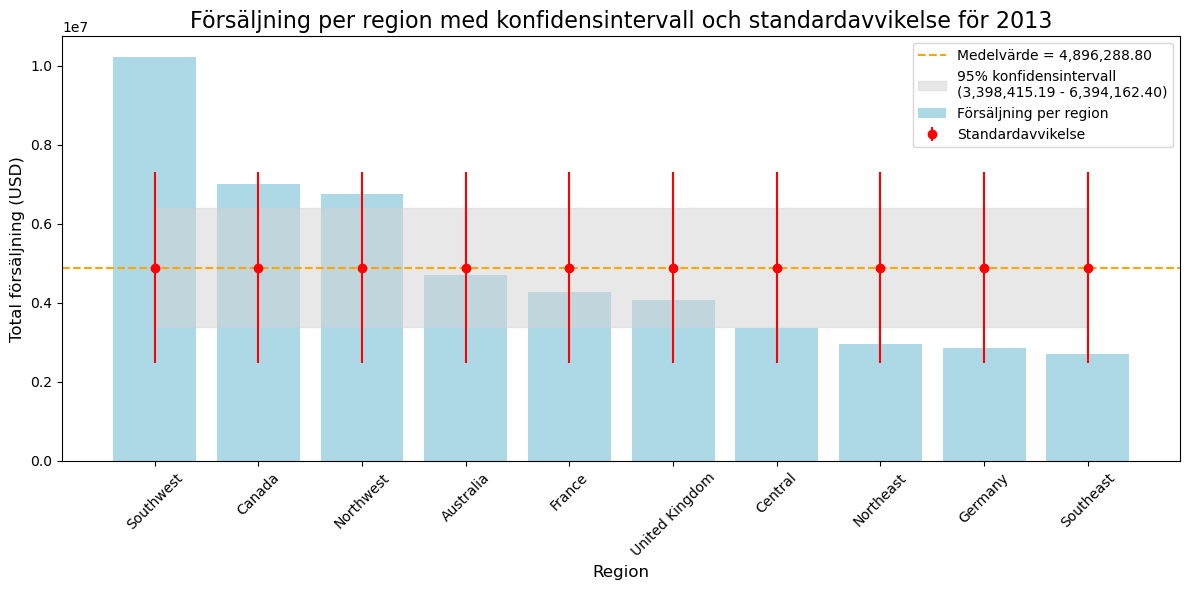

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Simulerad data från SQL-resultat
data = {
    "Region": ["Southwest", "Canada", "Northwest", "Australia", "France", "United Kingdom", "Central", "Northeast", "Germany", "Southeast"],
    "TotalSales": [10239209.34, 7010449.7, 6759500.67, 4702404.05, 4271019.27, 4068178.67, 3374336.29, 2965567.03, 2866491.97, 2705730.97]
}

df = pd.DataFrame(data)

# Beräkna medelvärde och standardavvikelse
mean_sales = df["TotalSales"].mean()
std_dev_sales = df["TotalSales"].std()
n = len(df)

# Beräkna 95 % konfidensintervall
confidence = 0.95
z_score = norm.ppf((1 + confidence) / 2)
margin_of_error = z_score * (std_dev_sales / np.sqrt(n))
confidence_interval = (mean_sales - margin_of_error, mean_sales + margin_of_error)

# Visa resultaten
print(f"Genomsnittlig försäljning per region: {mean_sales:,.2f}")
print(f"Standardavvikelse: {std_dev_sales:,.2f}")
print(f"95% konfidensintervall: {confidence_interval[0]:,.2f} - {confidence_interval[1]:,.2f}")

# Visualisera
plt.figure(figsize=(12, 6))

# Staplar för försäljning per region
plt.bar(df["Region"], df["TotalSales"], color="lightblue", label="Försäljning per region")

# Medelvärde som orange linje
plt.axhline(mean_sales, color="orange", linestyle="--", label=f"Medelvärde = {mean_sales:,.2f}")

# 95 % konfidensintervall som grått skuggat område
plt.fill_between(
    range(len(df)), confidence_interval[0], confidence_interval[1],
    color="lightgrey", alpha=0.5, label=f"95% konfidensintervall\n({confidence_interval[0]:,.2f} - {confidence_interval[1]:,.2f})"
)

# Standardavvikelse som röda punkter och linjer
for i, sales in enumerate(df["TotalSales"]):
    plt.errorbar(i, mean_sales, yerr=std_dev_sales, fmt='o', color='red', label="Standardavvikelse" if i == 0 else "")

# Lägg till etiketter och titlar
plt.title("Försäljning per region med konfidensintervall och standardavvikelse för 2013", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total försäljning (USD)", fontsize=12)
plt.xticks(range(len(df)), df["Region"], rotation=45)
plt.legend()
plt.tight_layout()

# Visa grafen
plt.show()

In [40]:
!git init

Initialized empty Git repository in C:/Users/anaba/.git/


In [42]:
!git add .
!git commit -m "sql"
!git remote add origin https://github.com/Ana-Anchy/SQL-kunskapskontroll.git
!git branch -M main
!git push -u origin main

error: open("AppData/Local/AMD/DX9Cache/0a571fc3.bin"): Permission denied
error: unable to index file 'AppData/Local/AMD/DX9Cache/0a571fc3.bin'
fatal: adding files failed


On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.anaconda/
	.conda/
	.condarc
	.continuum/
	.gitconfig
	.ipynb_checkpoints/
	.ipython/
	.jupyter/
	.matplotlib/
	.vscode/
	AdventureWorks2022
	AdventureWorks2022.db
	AppData/
	Contacts/
	Downloads/
	Favorites/
	Links/
	Music/
	NTUSER.DAT
	NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf
	NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms
	NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms
	OneDrive/
	Ordered_Monthly_Revenue_Table_2011_2014.csv
	Saved Games/
	Searches/
	TestSQL.ipynb
	Untitled.ipynb
	Untitled1.ipynb
	Untitled2.ipynb
	Videos/
	all_database_tables.csv
	anaconda3/
	ntuser.dat.LOG1
	ntuser.dat.LOG2
	ntuser.ini
	purchasing_tables.csv

nothing added to commit but untracked files present (use "git add" to track)


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Ana-Anchy/SQL-kunskapskontroll.git'


In [52]:
import os
print(os.getcwd())

C:\Users\anaba


In [56]:
!git add TestSQL

fatal: pathspec 'TestSQL' did not match any files
